In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [ ]:
df=pd.read_csv('/content/Clean_Dataset (1).csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Droping the useless column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
# Stastical Description of Data
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df.corr()        #Gives correlation matrix

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [ ]:
# Size of the data 
df.shape

(300153, 11)

In [ ]:
df1=df.groupby(['flight','airline'],as_index=False).count()         #Returns a groupby object which contain group info 
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

In [ ]:
df1

,flight,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,6E-102,Indigo,39,39,39,39,39,39,39,39,39
1,6E-105,Indigo,5,5,5,5,5,5,5,5,5
2,6E-113,Indigo,49,49,49,49,49,49,49,49,49
3,6E-121,Indigo,20,20,20,20,20,20,20,20,20
4,6E-123,Indigo,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...
1556,UK-988,Vistara,1381,1381,1381,1381,1381,1381,1381,1381,1381
1557,UK-993,Vistara,911,911,911,911,911,911,911,911,911
1558,UK-994,Vistara,1273,1273,1273,1273,1273,1273,1273,1273,1273
1559,UK-995,Vistara,1024,1024,1024,1024,1024,1024,1024,1024,1024


Indigo becaming as a most popular Airline

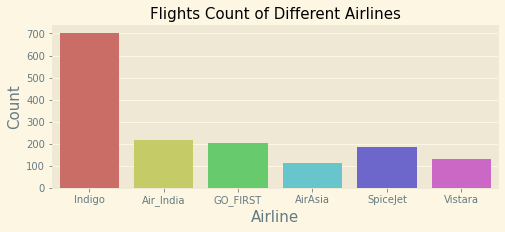

In [ ]:
plt.figure(figsize=(8,3))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [ ]:
df2=df.groupby(['flight','airline','class'],as_index=False).count() #as_index=False is effectively “SQL-style” grouped output. Sort group keys. Get better performance by turning this off.
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

Most of the Airlines has Economic Class as common

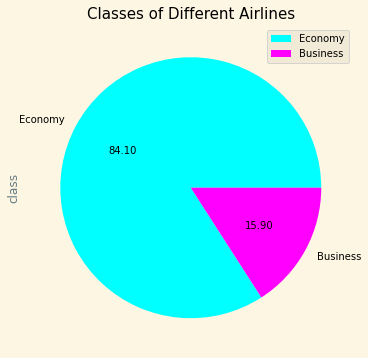

In [ ]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')  #autopct = '%.2f' # display the percentage value to 2 decimal places
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()


Does price vary with Airlines?

As we can see Vistara has Maximum Price range
Vistara and Air_India Airlines Have Maximum Price when compared to Others
SpiceJet , AirAsia , GO_First and Indigo has some what equal prices

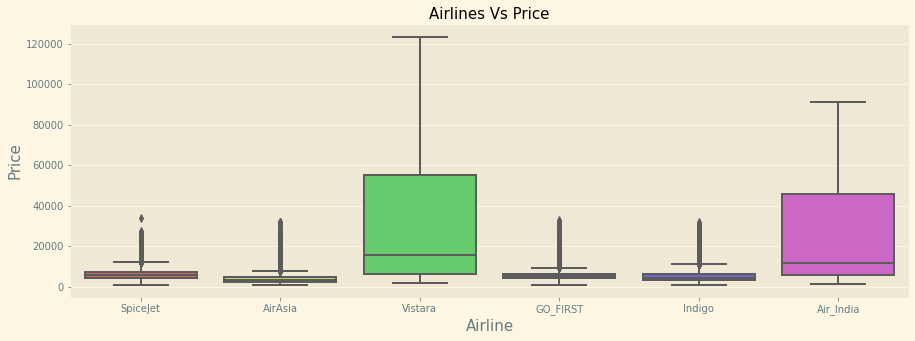

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Ticket Price is Maximum for Bussiness Class When compared to Economy Class

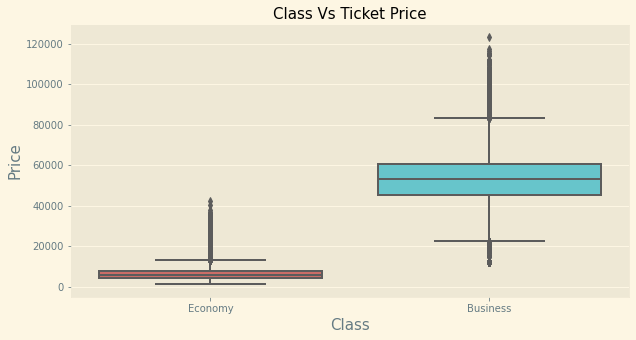

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Flights having one stop has maximum ticket price

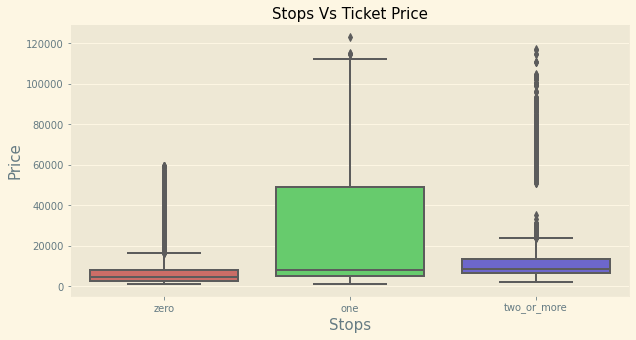

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

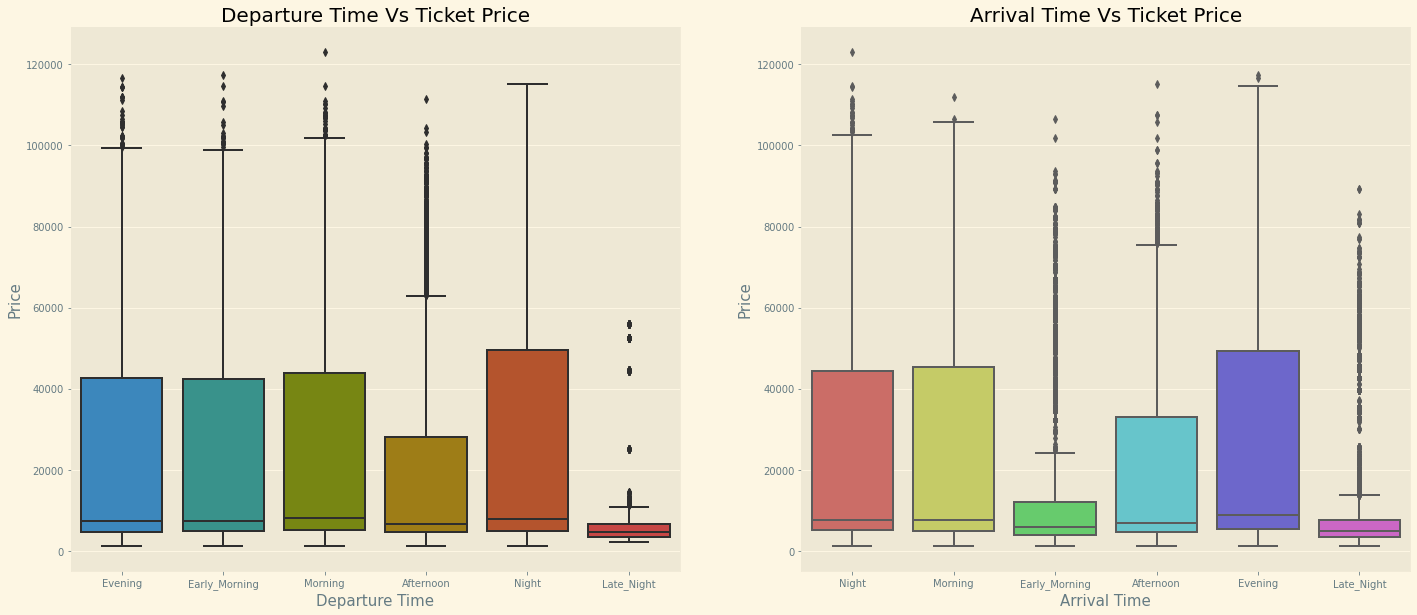

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

How the Ticket Price change based on the Departure Time and Arrival Time

1. Departure Time Vs Ticket Price

Ticket Price is More for the Flights when the Departure Time is at Night

Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening

Ticket Price is Low for the Flights Having Departure Time at Late_night

2. Arrival Time Vs Ticket Price
Ticket Price is More for the Flights when the Arrival Time is at Evening

Ticket Price is almost equal for flights Having Arrival time is at Morning and Night

Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time

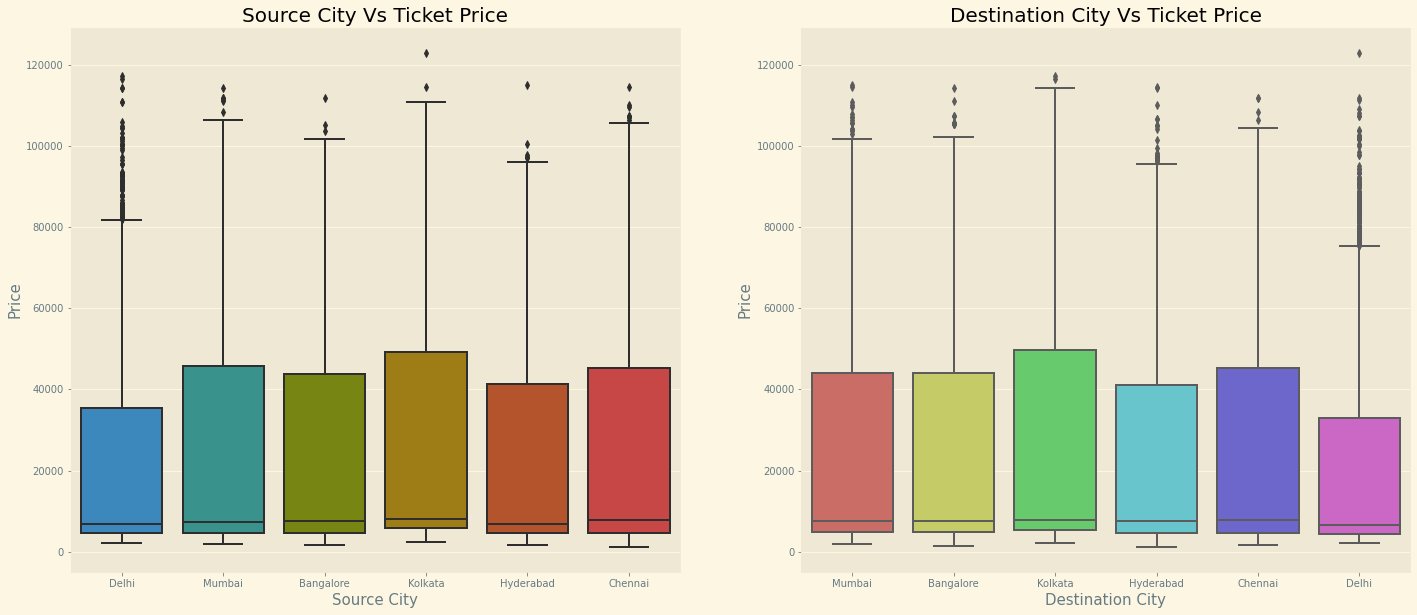

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

 price change with respect to change in Source city and Destination city -->>

1. Source City Vs Ticket Price

Ticket Price is More for the Flights whose Source City is Kolkata

Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , Hyderabad and Bangalore

Ticket Price is Low for the Flights Having Source City as Delhi

2. Destination City Vs Ticket Pric
e
Ticket Price is More for the Flights whose Destination City is kolkata and Chennai

Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore

Ticket Price is Low for the Flights Having Destination City as Delhi

#**How Price Varies with the Flight Duration Based on Class?**

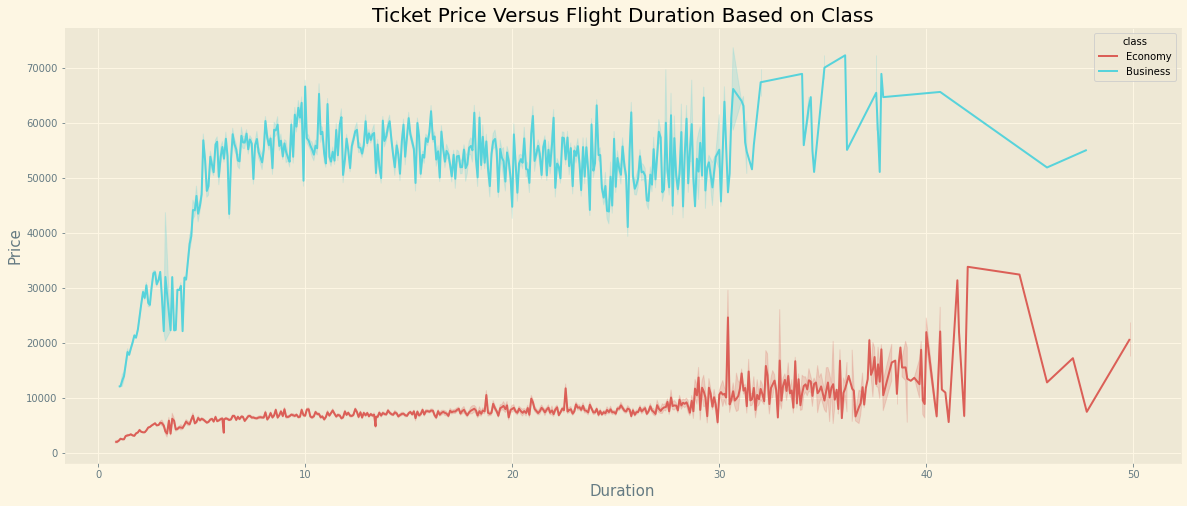

In [ ]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes**

#**How does the price affected on the days left for Departure?**

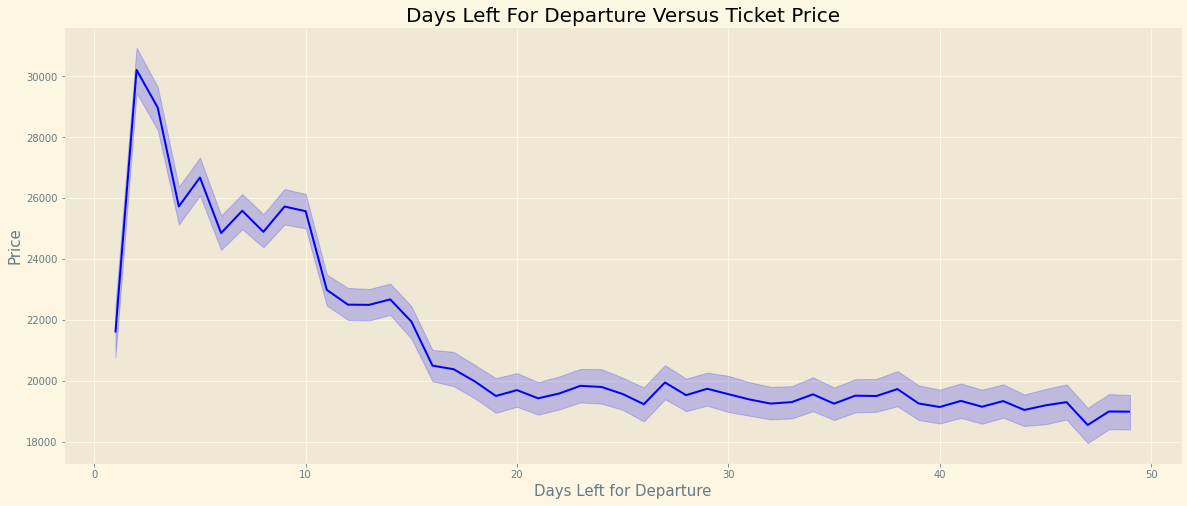

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

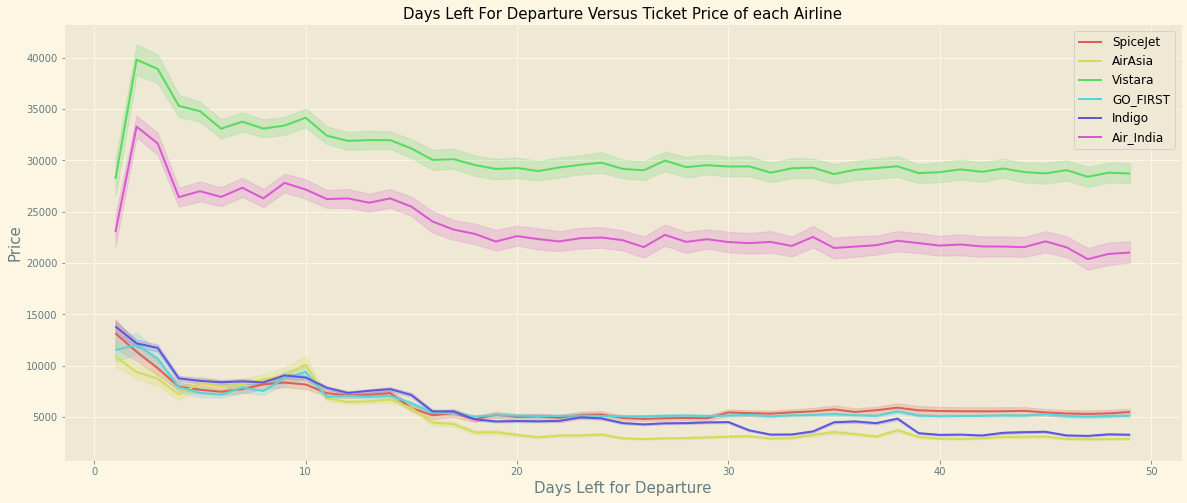

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**As we can see when compared to others when there are two days remaining for departure then the Ticket Price is very High for all airlines**




#**Total number of Flights from one city to another**

In [ ]:
df1=df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count()#.head(10)
df1.head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


#**Average Price of different Airlnes from Source city to Destination city**

In [ ]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [ ]:
# Creating a Back up File
df_bk=df.copy()

One-hot encoding is the representation of categorical variables as binary vectors. 
Label Encoding is converting labels/words into numeric form. Using one-hot encoding increases the dimensionality of the data set. Label encoding doesn't affect the dimensionality of the data set.

**OHE**

In [ ]:
airline = df[["airline"]]

airline = pd.get_dummies(airline, drop_first= True)

airline.head()

,airline
0,4
1,4
2,0
3,5
4,5


In [ ]:
source_city = df[["source_city"]]

source_city = pd.get_dummies(source_city, drop_first= True)

source_city.head()

,source_city
0,2
1,2
2,2
3,2
4,2


In [ ]:
destination_city = df[["destination_city"]]

destination_city = pd.get_dummies(destination_city, drop_first= True)

destination_city.head()

,destination_city
0,5
1,5
2,5
3,5
4,5


In [ ]:
departure_time = df[["departure_time"]]

departure_time = pd.get_dummies(departure_time, drop_first= True)

departure_time.head()

,departure_time
0,2
1,1
2,1
3,4
4,4


In [ ]:
arrival_time = df[["arrival_time"]]

arrival_time = pd.get_dummies(arrival_time, drop_first= True)

arrival_time.head()

,arrival_time
0,5
1,4
2,1
3,0
4,4


In [ ]:
stops = df[["stops"]]

stops = pd.get_dummies(stops, drop_first= True)

stops.head()

,stops
0,2
1,2
2,2
3,2
4,2


In [ ]:
flight = df[["flight"]]

flight = pd.get_dummies(flight, drop_first= True)

flight.head()

,flight
0,1408
1,1387
2,1213
3,1559
4,1549


In [ ]:
Class = df[["class"]]

Class = pd.get_dummies(Class, drop_first= True)

Class.head()

,class
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Coverting the labels into a numeric form using Label Encoder
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#for col in df.columns:
#    if df[col].dtype=='object':
#       df[col]=le.fit_transform(df[col])

In [ ]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [ ]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['price'],axis=1)
y=df['price']

In [ ]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42) #to produce the same results across a different run.
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [ ]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [ ]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [ ]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,  
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)  #
#friedman_mse-> The function to measure the quality of a split.
# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelGBR, modelXGR, modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1257.829
Mean Squared Error (MSE): 13528406.386
Root Mean Squared Error (RMSE): 3678.098
R2_score: 0.973714
Root Mean Squared Log Error (RMSLE): 8.21
Adj R Square:  0.973713
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1170.041
Mean Squared Error (MSE): 8191649.324
Root Mean Squared Error (RMSE): 2862.106
R2_score: 0.984084
Root Mean Squared Log Error (RMSLE): 7.959
Adj R Square:  0.984083
------------------------------------------------------------------------

In [ ]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4630.295614,0.904653,7005.015436,4.907024e+07,8.854382,0.904656
1,DecisionTreeRegressor(),1267.610786,0.973070,3722.862302,1.385970e+07,8.222248,0.973071
2,"(DecisionTreeRegressor(max_features='auto', ra...",1166.281227,0.984155,2855.607942,8.154497e+06,7.957040,0.984156
3,KNeighborsRegressor(),1853.746812,0.971657,3819.270820,1.458683e+07,8.247815,0.971658
4,([DecisionTreeRegressor(criterion='friedman_ms...,2808.070407,0.956823,4713.930298,2.222114e+07,8.458277,0.956824
5,"XGBRegressor(base_score=None, booster=None, ca...",1866.030982,0.977947,3368.903685,1.134951e+07,8.122343,0.977948
6,Ridge(),4630.313301,0.904653,7005.011583,4.907019e+07,8.854381,0.904656
7,Lasso(alpha=0.1),4630.179207,0.904653,7005.006183,4.907011e+07,8.854380,0.904656


In [ ]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,RandomForestRegressor,0.984155,1166.281227,2855.607942,8.154497e+06,7.957040,0.984156
1,GradientBoostingRegressor,0.977947,1866.030982,3368.903685,1.134951e+07,8.122343,0.977948
2,DecisionTreeRegressor,0.973070,1267.610786,3722.862302,1.385970e+07,8.222248,0.973071
3,KNeighborsRegressor,0.971657,1853.746812,3819.270820,1.458683e+07,8.247815,0.971658
4,ExtraTreesRegressor,0.956823,2808.070407,4713.930298,2.222114e+07,8.458277,0.956824
5,LinearRegression,0.904653,4630.295614,7005.015436,4.907024e+07,8.854382,0.904656
6,XGBRegressor,0.904653,4630.313301,7005.011583,4.907019e+07,8.854381,0.904656
7,BaggingRegressor,0.904653,4630.179207,7005.006183,4.907011e+07,8.854380,0.904656


From the Above Results, we selected two models and going forword with Ridge regression 

1. Ridge()



#**Training the Data with Ridge**

In [ ]:
#Trainig the model with
modelRE.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = modelRE.predict(x_test)

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [ ]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
23210,GO_FIRST,G8-336,Delhi,Afternoon,one,Night,Kolkata,Economy,9.25,19,5954,5954,7996.743365
211301,Vistara,UK-815,Delhi,Morning,one,Night,Mumbai,Business,12.17,43,58876,58876,52781.719224
21900,Air_India,AI-560,Delhi,Morning,one,Morning,Kolkata,Economy,23.92,12,11625,11625,9284.114469
229861,Vistara,UK-851,Mumbai,Early_Morning,one,Afternoon,Delhi,Business,5.67,48,53152,53152,50434.768440
54577,Air_India,AI-635,Mumbai,Early_Morning,one,Night,Bangalore,Economy,13.00,12,9201,9201,8163.218534
51112,Vistara,UK-863,Mumbai,Morning,one,Night,Delhi,Economy,12.50,41,6122,6122,8503.733067
139327,Air_India,AI-763,Kolkata,Early_Morning,one,Late_Night,Bangalore,Economy,17.17,28,7053,7053,5984.929998
290553,Vistara,UK-836,Chennai,Morning,one,Night,Mumbai,Business,11.08,5,80566,80566,57583.618798
74498,Air_India,AI-809,Mumbai,Morning,one,Evening,Hyderabad,Economy,31.58,30,8336,8336,7485.912296
283334,Vistara,UK-870,Hyderabad,Night,one,Evening,Kolkata,Business,21.50,9,76314,76314,57619.151057


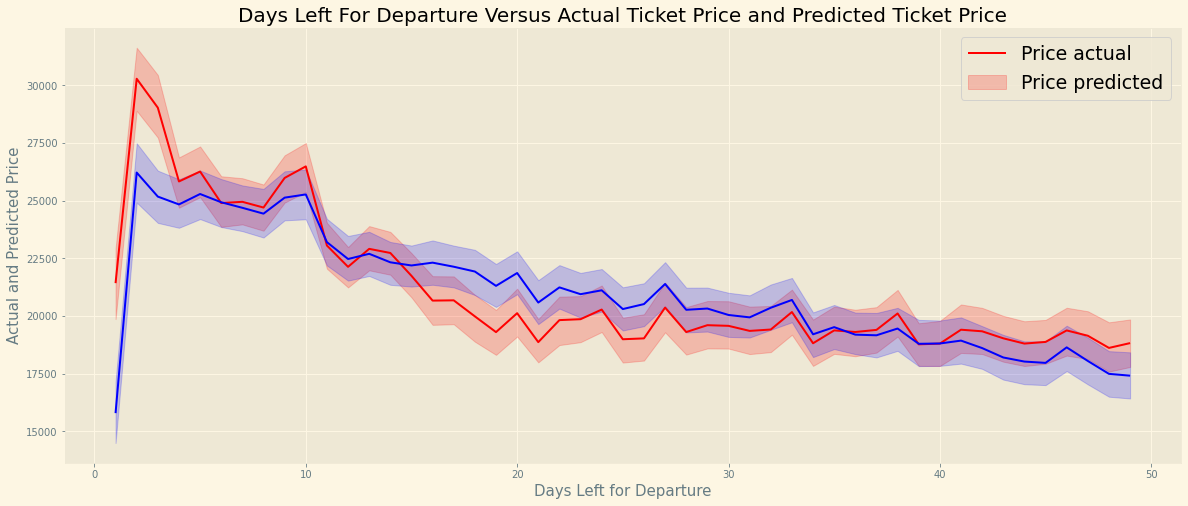

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

In [ ]:
#Trainig the model with
modelRE.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = modelRE.predict(x_test)

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [ ]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
156113,Vistara,UK-898,Hyderabad,Early_Morning,one,Afternoon,Delhi,Economy,6.50,31,5823,5823,8015.182347
90160,Air_India,AI-507,Bangalore,Early_Morning,one,Evening,Delhi,Economy,9.75,31,5212,5212,4501.171926
84980,Vistara,UK-814,Bangalore,Night,zero,Night,Delhi,Economy,2.58,7,7489,7489,4968.421046
73204,GO_FIRST,G8-2508,Mumbai,Night,one,Morning,Hyderabad,Economy,9.75,22,3916,3916,7826.371828
61806,Air_India,AI-888,Mumbai,Evening,one,Morning,Kolkata,Economy,14.00,3,12768,12768,9804.515892
242105,Vistara,UK-954,Mumbai,Early_Morning,one,Evening,Chennai,Business,10.33,11,49613,49613,56008.566884
1351,Indigo,6E-2083,Delhi,Early_Morning,one,Morning,Mumbai,Economy,5.42,9,9373,9373,9612.731867
173580,Air_India,AI-559,Hyderabad,Early_Morning,one,Evening,Kolkata,Economy,12.67,27,4368,4368,5872.917478
72434,Vistara,UK-986,Mumbai,Night,one,Evening,Hyderabad,Economy,21.17,17,4414,4414,12100.407155
200459,Vistara,UK-822,Chennai,Morning,one,Evening,Kolkata,Economy,8.33,27,8816,8816,9211.687675


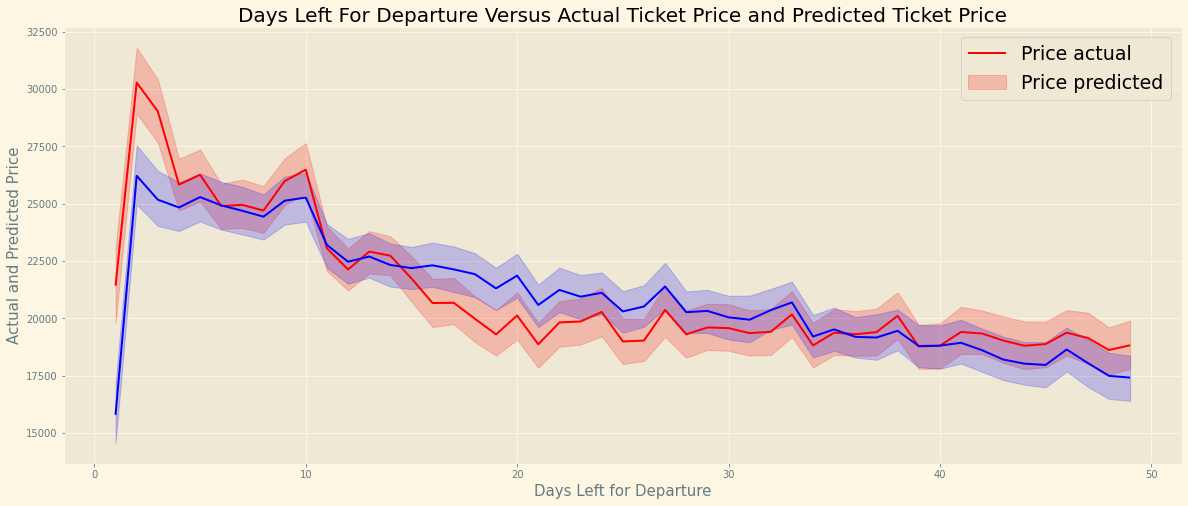

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

PICKLE FILE

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('flight_modelRE.pkl', 'wb')

# dump information to that file
pickle.dump(modelRE, file)

In [ ]:
model = open('flight_modelRE.pkl','rb')
Ridge = pickle.load(model)

In [ ]:
y_prediction = Ridge.predict(x_test)

In [ ]:
metrics.r2_score(y_test, y_prediction)

0.9046563413150092